# F4Enix post-processing pipeline example

This examples aim to demonstrate a number of features of the F4Enix tool related to the ``f4enix.output`` sub-module.

## Working with the MCTAL file

In [1]:
# Import the mctal module
from f4enix.output.mctal import Mctal

# Parse the Mctal file
file = 'mctal'
mctal = Mctal(file)

# get a summary of the min and max errors across tallies
mctal.get_error_summary().sort_values(by='tally num')

,tally num,min error,max error
0,4,NaN,1.0000
22,6,0.0007,0.0272
19,14,NaN,1.0000
1,16,0.0008,0.0381
2,24,0.0009,0.0162
20,26,0.0010,0.0274
3,34,0.0009,0.0209
4,44,0.0010,0.0213
5,54,0.0011,0.0210
6,64,0.0010,0.0159


In [2]:
# Access the data of a specific tally (204 in this case)
mctal.tallydata[204]

,Cells,Value,Error
0,2,3367640.0,0.0264
1,3,4183630.0,0.0255
2,4,6022490.0,0.0242
3,5,9160960.0,0.0231
4,6,14496000.0,0.0219
...,...,...,...
92,101,1948950.0,0.0209
93,102,1197290.0,0.0219
94,103,709479.0,0.0230
95,104,390849.0,0.0244


## Working with MCNP output files

In [3]:
# Import the related module and parse the MCNP output file
from f4enix.output.MCNPoutput import Output

# Parse the output file
file = 'outp'
outp = Output(file)
# Check how many histories were run
'%.2E' % outp.get_NPS()

'1.30E+06'

In [4]:
# It is possible to read any printed table in the output
# Some issues still in the header names due to uncorrect format in MCNP FWF
# but the data is good
table_126 = outp.get_table(126)
display(table_126)

# get for instance a percentage of unpopulated cells (i.e. 0 tracks entering)
unpopulated = len(table_126[table_126['populatio  '].astype(int) == 0])
print('Unpopulated cells fraction: {} %'.format(unpopulated/len(table_126)*100))

,,cell,tracks entering,populatio,n collision,s collisions * weight (per history,number weighted ) energy,flux weighted energy,average track weigh (relative),average t track mfp (cm)
3,1.0,1,67761,21834,0,0.0000E+00,6.6059E-04,1.1145E-01,3.9059E-01,0.0000E+00
4,2.0,2,151292,38978,723120,2.5594E-08,6.3680E-04,1.0275E-01,3.9016E-01,2.0512E+00
5,3.0,3,190545,87763,904058,3.2071E-08,6.5850E-04,1.0890E-01,3.9137E-01,2.0691E+00
6,4.0,4,137355,72164,654428,4.6785E-08,6.9021E-04,1.1273E-01,3.9447E-01,2.0756E+00
7,5.0,5,211095,118130,997772,7.1780E-08,7.3532E-04,1.1886E-01,3.9740E-01,2.0927E+00
...,...,...,...,...,...,...,...,...,...,...
103,101.0,101,206603,116327,974133,6.8685E-08,7.7465E-04,1.2937E-01,3.8879E-01,2.1107E+00
104,102.0,102,127498,69222,603744,4.2456E-08,7.5006E-04,1.2385E-01,3.8780E-01,2.1019E+00
105,103.0,103,152114,87365,721244,2.5246E-08,7.2502E-04,1.1802E-01,3.8592E-01,2.0967E+00
106,104.0,104,84345,47710,399807,1.3994E-08,7.3884E-04,1.2076E-01,3.8564E-01,2.1014E+00


Unpopulated cells fraction: 0.0 %


In [5]:
# Check the MCNP 10 statistical checks
outp.get_stat_checks_table().sort_index()  # sort them by cell index

,mean behaviour,rel error value,rel error decrease,rel error decrease rate,VoV value,VoV decrease,VoV decrease rate,FoM value,FoM behaviour,PDF slope,Other TFC bins
Cell,,,,,,,,,,,
4,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
6,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
14,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
16,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
24,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
26,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
34,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
44,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed
54,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Passed


In [6]:
# Get more info on the checks on a specific tally
outp.get_tally_stat_checks(74)

,mean behaviour,rel error value,rel error decrease,rel error decrease rate,VoV value,VoV decrease,VoV decrease rate,FoM value,FoM behaviour,PDF slope
TFC bin behaviour,,,,,,,,,,
desired,random,<0.10,yes,1/sqrt(nps),<0.10,yes,1/nps,constant,random,>3.00
observed,random,0.00,yes,yes,0.00,yes,yes,constant,decrease,10.00
passed?,yes,yes,yes,yes,yes,yes,yes,yes,no,yes


## Working with MCNP MESHTAL file

In [3]:
# import the related module and parse a meshtal file
from f4enix.output.meshtal import Meshtal

# file = 'mode0_plasma_prod.msht'
file = 'meshtal'
meshtal = Meshtal(file)

# By default all meshes are parsed, but if speed up is needed, only a subset
# of them can be selected
meshtal.readMesh()
meshtal


 Meshtally file : meshtal   Tally 1004 : neutron  flux mesh   'Neutron Flux [#/cc/s]'    Tally 1024 : photon  flux mesh   'Photon Flux [#/cc/s]' 

In [5]:
import tempfile  # To have a scratch directory for the example
outpath = tempfile.gettempdir()

# fmeshes can be dumped all together 
meshtal.write_all(outpath, out_format='vtk')

# Or specifically with higher control
meshtal.mesh[1004].write(outpath, list_array_names=['Value - Total'],
                         out_format='ip_fluent', outfile='custom name')

Writing values: 100%|██████████| 1000/1000 [00:00<00:00, 348046.14 values/s]


In [9]:
# select a specific fmesh.
n_flux_fmesh = meshtal.mesh[1004]

# Access the related pyvista object and all its powerful methods
n_flux = n_flux_fmesh.grid
n_flux

RectilinearGrid (0x20398af73a0)
  N Cells:      1000
  N Points:     1331
  X Bounds:     -1.300e+03, 1.300e+03
  Y Bounds:     -1.300e+03, 1.300e+03
  Z Bounds:     -9.000e+02, 9.000e+02
  Dimensions:   11, 11, 11
  N Arrays:     2

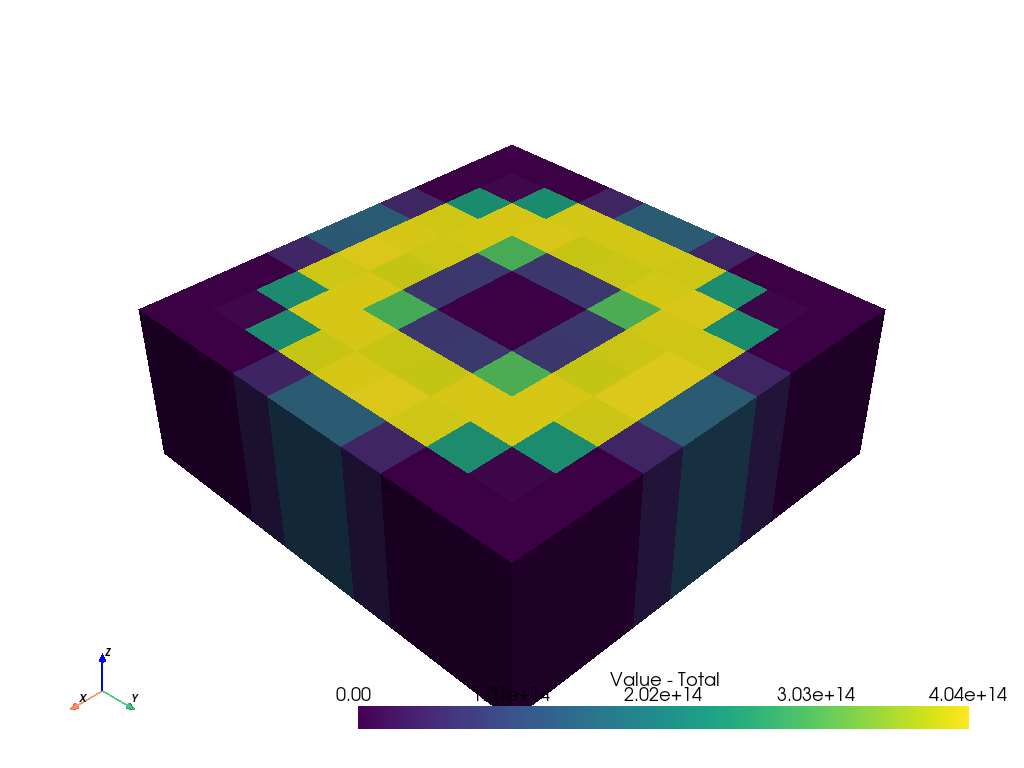

In [10]:
# quick plot to check that the meshes are not empty
clip = n_flux.clip(normal='z')  # native pyvista clip
clip.plot(scalars='Value - Total', jupyter_backend='static')

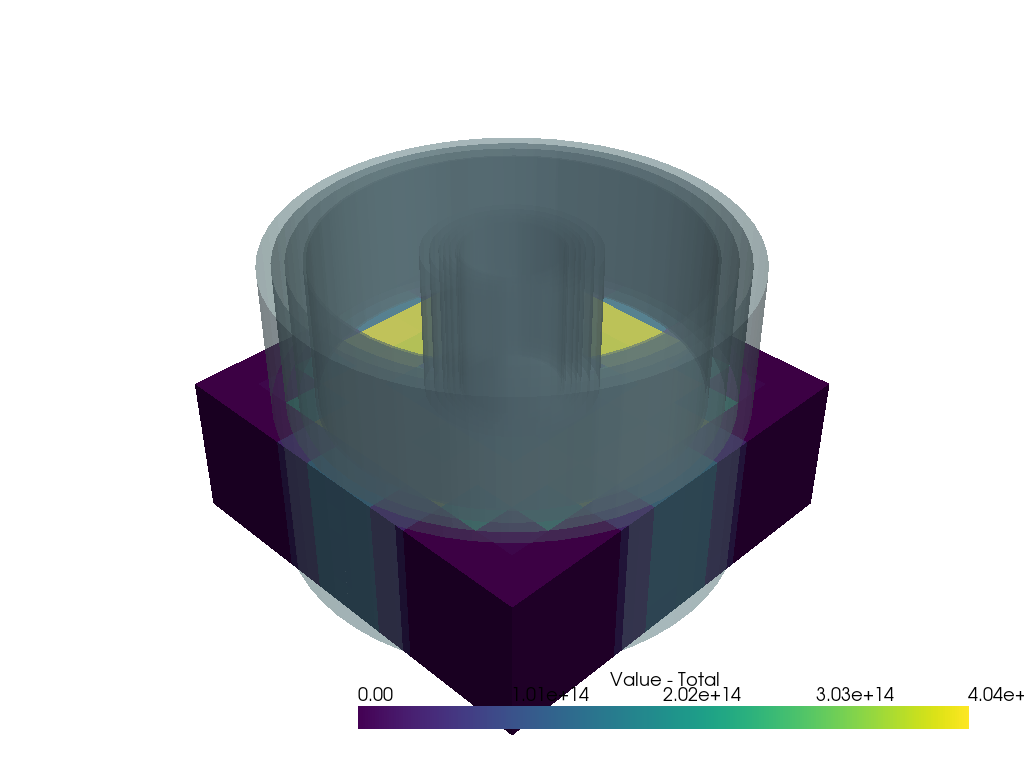

In [11]:
import pyvista as pv

# Load an .stl file to be used for plots and plot them with the fmesh to check
# that the units match
stl = pv.read('iter1D.stl').scale(10)  # scale the stl to have same units

# Set up and show a pyvista plotter
plotter = pv.Plotter()
plotter.add_mesh(clip)
plotter.add_mesh(stl, opacity=0.4)
plotter.show(jupyter_backend='static')

In [12]:
# Load additional modules related to Atlas production
from f4enix.output.plotter import MeshPlotter, Atlas
from copy import deepcopy

# Get a basic PyVista mesh where to store all other data
global_mesh = deepcopy(meshtal.mesh[1004].grid)

# On the same grid, load all the different fmeshes results. In this case there
# are only two
for tally_num, fmesh in meshtal.mesh.items():
    # get the FC card comment for the fmesh to be used as name of the scalar
    name = fmesh.comment.strip()
    # get the scalar values
    data = fmesh.grid['Value - Total']
    # Adding the array to the global mesh
    global_mesh[name] = data

# Clean the original results from the template mesh
global_mesh.cell_data.remove('Value - Total')
global_mesh.cell_data.remove('Error - Total')

global_mesh

RectilinearGrid (0x203ab638a60)
  N Cells:      1000
  N Points:     1331
  X Bounds:     -1.300e+03, 1.300e+03
  Y Bounds:     -1.300e+03, 1.300e+03
  Z Bounds:     -9.000e+02, 9.000e+02
  Dimensions:   11, 11, 11
  N Arrays:     2

### Slicing

There are different slicing methods that have been defined in F4Enix. All of them produces slices that can be automatically plotted in order to build an atlas.

In [13]:
# Initialize the custom plotter with the mesh and stl
plotter = MeshPlotter(global_mesh, stl=stl)

# There are many default settings that can be modified, e.g.:
# plotter.legend_args['vertical'] = False

('theta = 0.0 deg', PolyData (0x203b8ab7c40)
  N Cells:    100
  N Points:   121
  N Strips:   0
  X Bounds:   0.000e+00, 0.000e+00
  Y Bounds:   -1.300e+03, 1.300e+03
  Z Bounds:   -9.000e+02, 9.000e+02
  N Arrays:   2, PolyData (0x203b8b2c220)
  N Cells:    190
  N Points:   138
  N Strips:   0
  X Bounds:   4.000e-01, 4.000e-01
  Y Bounds:   -1.379e+03, 1.379e+03
  Z Bounds:   -9.000e+02, 9.000e+02
  N Arrays:   0)


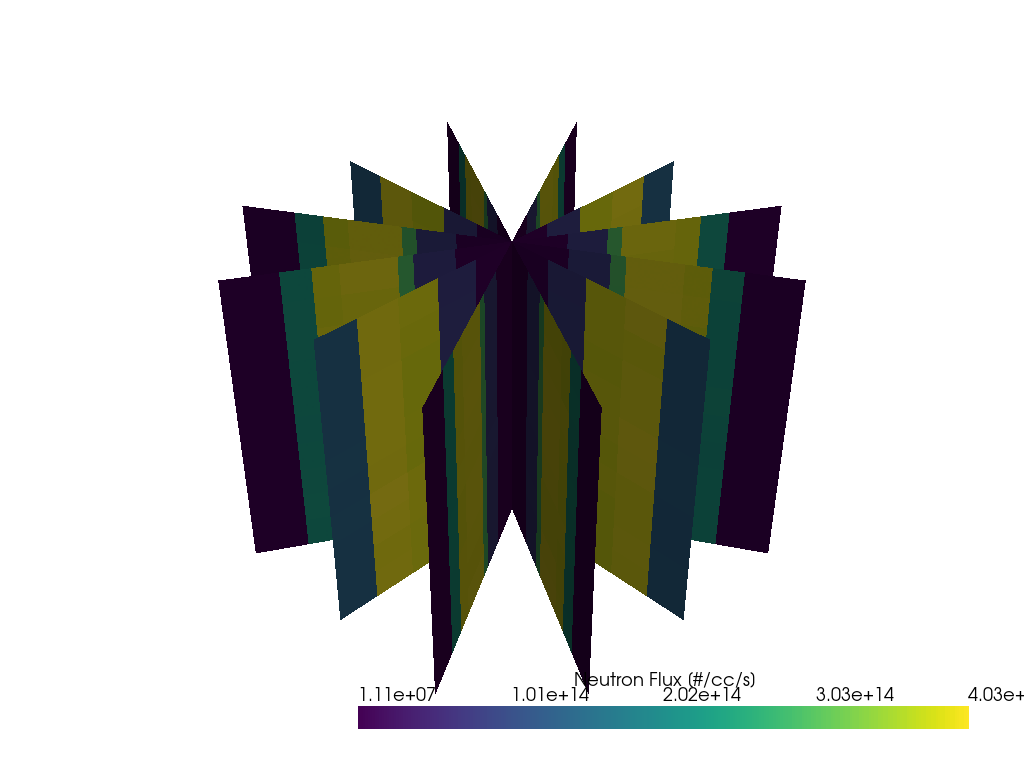

In [14]:
# toroidal slicing. It can be done on all the 180 deg or specify the sector
# and origin
toroidal_slices = plotter.slice_toroidal(30)  # 30 deg. increment
# Show the first slice
print(toroidal_slices[0])  # (name of the slice, mesh slice, stl slice)

# Use pyvista native plotter just as an example to show what is the output
pv_plotter = pv.Plotter()
for slices in toroidal_slices:
    mesh_slice = slices[1]
    pv_plotter.add_mesh(mesh_slice)

pv_plotter.show(jupyter_backend='static')

#### Normal slicing

('theta = 0.0 deg', PolyData (0x242f7ee1480)
  N Cells:    100
  N Points:   121
  N Strips:   0
  X Bounds:   0.000e+00, 0.000e+00
  Y Bounds:   -1.300e+03, 1.300e+03
  Z Bounds:   -9.000e+02, 9.000e+02
  N Arrays:   2, PolyData (0x242f7ee1de0)
  N Cells:    190
  N Points:   138
  N Strips:   0
  X Bounds:   -4.000e-01, -4.000e-01
  Y Bounds:   -1.379e+03, 1.379e+03
  Z Bounds:   -9.000e+02, 9.000e+02
  N Arrays:   0)


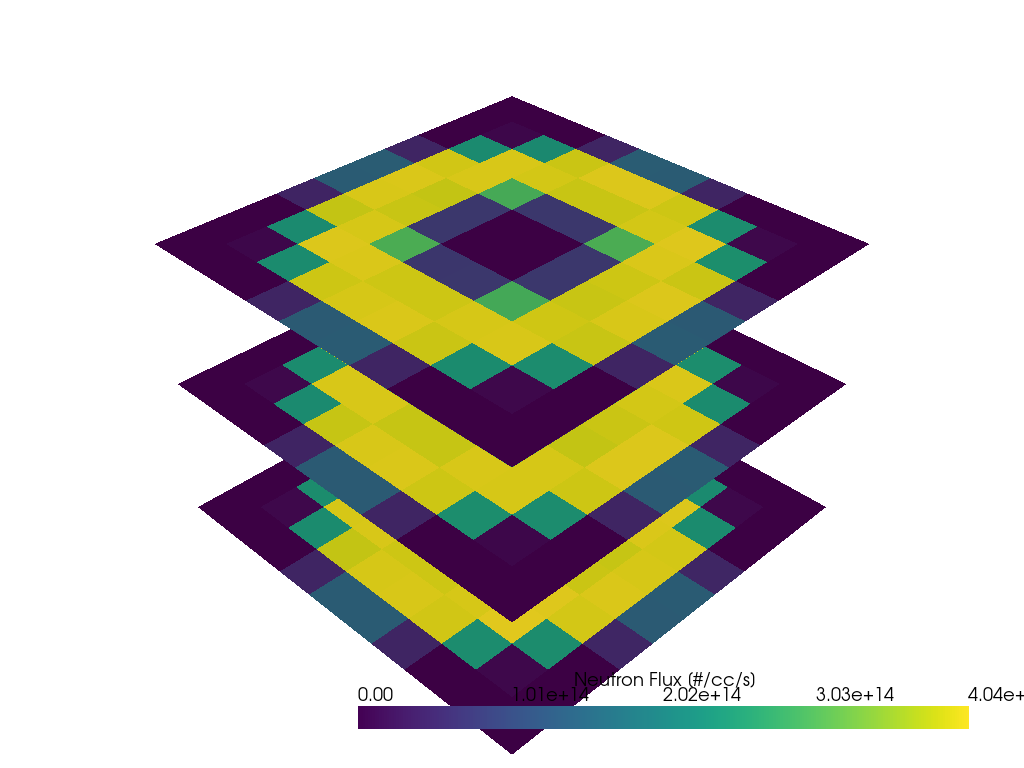

In [14]:
# perform slices normal to the selected axis
horizontal_slices = plotter.slice_on_axis('z', 3)  # 3 slices from max to min
# Show the first slice
print(toroidal_slices[0])  # (name of the slice, mesh slice, stl slice)

# Use pyvista native plotter just as an example to show what is the output
pv_plotter = pv.Plotter()
for slices in horizontal_slices:
    mesh_slice = slices[1]
    pv_plotter.add_mesh(mesh_slice)

pv_plotter.show(jupyter_backend='static')

#### General slicing

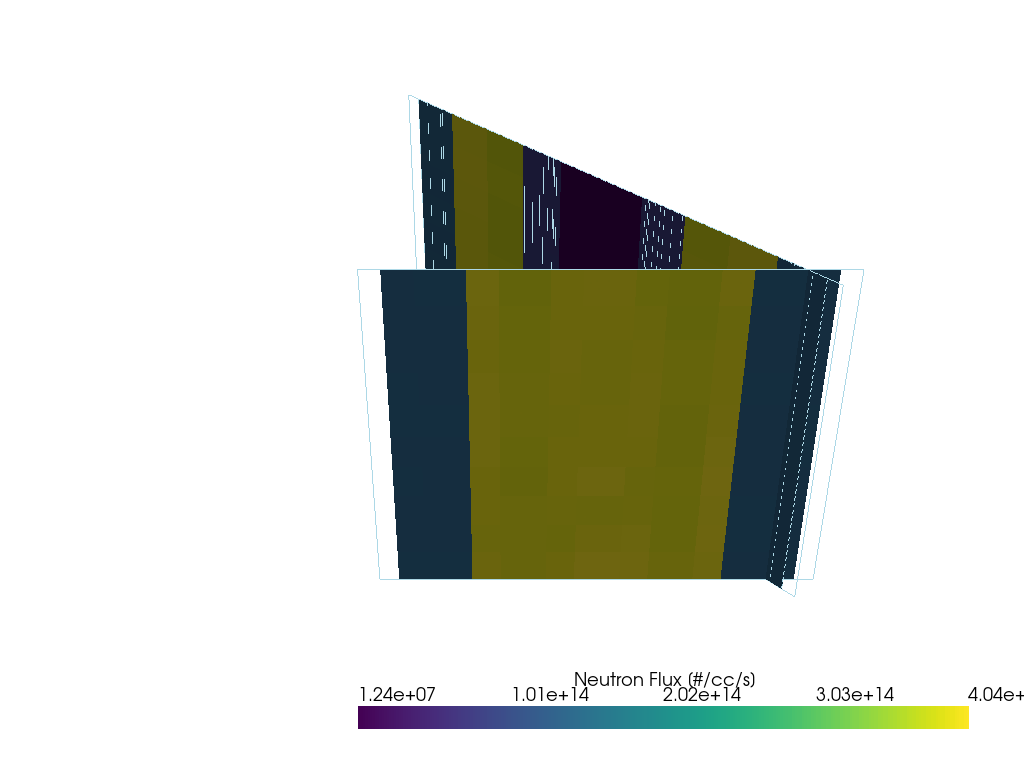

In [15]:
# General slicing using origin and normals for each slice
# [name, x, y, z, ux, uy, uz]
slices_param = [['slice1', 0, 0, 0, 1, 0, 0],
                ['slice2', 500, 700, 300, 0.5, 0.5, 0]]
general_slices = plotter.slice(slices_param)

# Use pyvista native plotter just as an example to show what is the output
pv_plotter = pv.Plotter()
for slices in general_slices:
    mesh_slice = slices[1]
    stl_slice = slices[2]
    pv_plotter.add_mesh(mesh_slice)
    pv_plotter.add_mesh(stl_slice)

pv_plotter.show(jupyter_backend='static')

### Build the Atlas

tallies: 100%|██████████| 2/2 [00:06<00:00,  3.14s/it]

('Neutron Flux [#/cc/s]', [('theta = 0.0 deg', <PIL.Image.Image image mode=RGB size=794x422 at 0x2428F9BB6D0>), ('theta = 30.0 deg', <PIL.Image.Image image mode=RGB size=808x382 at 0x2428F9B9900>), ('theta = 60.0 deg', <PIL.Image.Image image mode=RGB size=808x382 at 0x243A2DC1CC0>), ('theta = 90.0 deg', <PIL.Image.Image image mode=RGB size=794x422 at 0x243A2DC3E80>), ('theta = 120.0 deg', <PIL.Image.Image image mode=RGB size=808x382 at 0x243A2DC36A0>), ('theta = 150.0 deg', <PIL.Image.Image image mode=RGB size=808x382 at 0x243A2DC3190>), ('Pz = -882.0', <PIL.Image.Image image mode=RGB size=752x524 at 0x243A2DC20B0>), ('Pz = 0.0', <PIL.Image.Image image mode=RGB size=752x524 at 0x243A2DC2B60>), ('Pz = 882.0', <PIL.Image.Image image mode=RGB size=752x524 at 0x243A2DC1DB0>)])
[('theta = 0.0 deg', <PIL.Image.Image image mode=RGB size=794x422 at 0x2428F9BB6D0>), ('theta = 30.0 deg', <PIL.Image.Image image mode=RGB size=808x382 at 0x2428F9B9900>), ('theta = 60.0 deg', <PIL.Image.Image image 

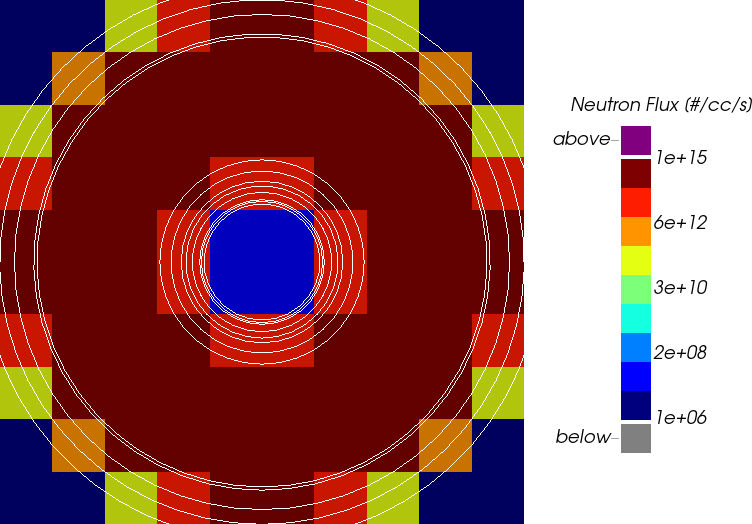

In [20]:
# Time to plot the slices

# Cycle on all the mesh quantities
sections = []
for array_name in global_mesh.array_names:

    # Arbitrary logic can be inserted here
    min_val = 1e6
    max_val = 1e15
    n_colors = 9
    min_max = (min_val, max_val)

    # Plot both the vertical and toroidal slice related to the quantity
    tot_images = []
    for slices in [toroidal_slices, horizontal_slices]:
        # Plot the slices
        images = plotter.plot_slices(slices, array_name,
                                     n_colors=n_colors,
                                     min_max=min_max)
        tot_images.extend(images)

    sections.append((array_name, tot_images))

# Show one of the images that will build the atlas
print(sections[0])
print(sections[0][1])
print(sections[0][1][-1])
sections[0][1][-1][1]

In [17]:
import tempfile  # To have a scratch directory for the example

# Finally build the atlas. This can be built either from folders containing
# images, where each subfolder is interpreted as a new section, or adding each
# section manually. This second option is recommended since it allows to avoid
# saving the images to disk

# initialize the atlas
atlas = Atlas('Atlas example')

# Decrease the default width of plots (by default they occupy the entire text
# length)
atlas.default_width = atlas.default_width*0.9

# Build one section for each quantity
for arrayname, images in sections:
    atlas.add_section(arrayname, images)

outpath = tempfile.gettempdir()
print(outpath)  # We are saving in the default temporary directory
atlas.save(outpath)

C:\Users\laghida\AppData\Local\Temp


## Working with MESHINFO files

This kind of files are additional files that are printed by a
D1S-UNED run that contain information on the meshes defined
in an MCNP input

In [1]:
from f4enix.output.meshinfo import MeshInfoFile

# load the mesh info from an existing file
meshinfo_file = MeshInfoFile.from_file('meshinfo')
meshinfo_file.info  # Each mesh info is stored in the .info dictionary

{4: <f4enix.output.meshinfo.MeshInfoCyl at 0x19041502740>,
 234: <f4enix.output.meshinfo.MeshInfoCyl at 0x1905180acb0>}

In [2]:
# these are simple objects that store a quantity of data about the meshes
# check the documentation for a complete list of attributes
meshinfo = meshinfo_file.info[4]
print('axis: ', meshinfo.axis)
print('mesh type: ', meshinfo.coordinates)

axis:  [0. 0. 1.]
mesh type:  CoordinateType.CYL


The most important attribute though is its ``DataMass`` object, which contains
a dataframe reporting the mass of each MCNP cell portion contained inside
a specific voxel. The correspondent material is also provided.

In [3]:
datamass = meshinfo.data_mass
datamass.df

,,,Mass [g]
Voxel,Material,Cell,
1,0,4,0.000000
2,0,4,0.000000
3,0,4,0.000000
4,0,4,0.000000
5,0,4,0.000000
...,...,...,...
2348,1,1,121449.990840
2349,1,1,121449.990840
2350,1,1,48580.072062


A few helper methods have also been provided for this class.

In [14]:
# get a list of cells having a specific material
print('cells with material M1')
print(datamass.get_cells_from_materials([1]))

# Apply some filters to the DF
print('filtered df')
datamass.get_filtered_dataframe(voxels=[1, 2, 50, 120], materials=[0],
                                cells=[4])

cells with material M1
[  2 201   1 101]
filtered df


,,,Mass [g]
Voxel,Material,Cell,
1,0,4,0.0
2,0,4,0.0
120,0,4,0.0


## Analyzing a RSSA

MCNP allows to record particles crossing a surface during a
Monte Carlo simulation in order to use them as a source in
a subsequent analyses. These particle tracks are stored in
a file called RSSA.

### Loading and analyzing a RSSA file

The binary reader of this tool is very fast as it has been vectorized via Numpy. Reading a RSSA file of 6 Gb with the PyNE reader takes around 15 minutes while this reader does the same in 10 seconds. Lets start by loading a new RSSA file.

In [3]:
from f4enix.output.rssa import RSSA  # RSSA is a class representing a RSSA file

# The class is initialized by providing the path to the file 
my_rssa = RSSA('small_cyl.w')
my_rssa # printing shows relevant information

RSSA file small_cyl was recorded using the following surfaces:
  Surface id: 1
The surface type is a cylinder with a radius of 30.00
The total amount of tracks recorded is 72083, of which 72083 were neutrons and 0 were photons.
The simulation that produced this RSSA run 100000 histories
The amount of independent histories that reached the RSSA surfaces was 70797.

In [4]:
my_rssa.tracks  # This is an array containing all the infomation of all the tracks
my_rssa.x  # With this command we acces a vector holding the X position of every track
my_rssa.y  
my_rssa.z  # Same for Y and Z coordinates and the Weight values of the tracks
my_rssa.wgt
my_rssa.energies
my_rssa.histories  # History number of the tracks

# Lets print some information of the 1234 track recorded in the RSSA file
index = 1234
position = (my_rssa.x[index], my_rssa.y[index], my_rssa.z[index])
print(f'The track with index {index} was recorded at position:\n{position}')
print(f'The track had an energy of {my_rssa.energies[index]} MeV and weight of {my_rssa.wgt[index]}')
print(f'The track was originated at the history number {my_rssa.histories[index]}')

The track with index 1234 was recorded at position:
(-0.13126632308094988, 29.99971281783252, 12.254586722666627)
The track had an energy of 14.0 MeV and weight of 1.0
The track was originated at the history number 1739.0


The RSSA file may contain both neutrons and photons. The tool has a way to easily dicriminate between particle types with the use of filters, also called masks.

In [6]:
# not extremely useful in this case since only neutrons were recorded here
mask = my_rssa.mask_neutron_tracks  # to show only neutrons
mask = my_rssa.mask_photon_tracks  # to show only photons
my_rssa.x[mask]  # Show the x values for all the tracks included in the mask

total_amount_tracks = len(my_rssa.tracks)
print(f'This RSSA file recorded {total_amount_tracks} tracks...')
mask = my_rssa.mask_neutron_tracks
neutron_amount_tracks = len(my_rssa.tracks[mask])
print(f' of which {neutron_amount_tracks} were neutrons.')

This RSSA file recorded 72083 tracks...
 of which 72083 were neutrons.


### Plot cylindrical surfaces

The level of customization possible with these type of plots is quite high.

The area of a cell is 0.01cm2
The resolution is 0.10cm x 0.10cm


(<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>)

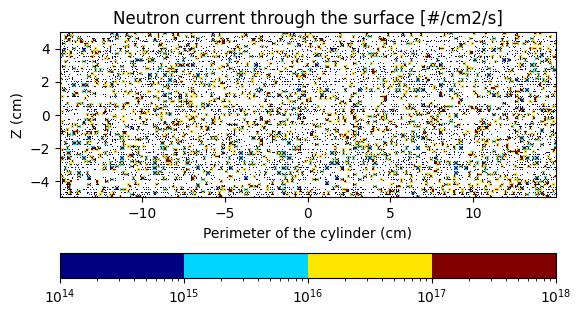

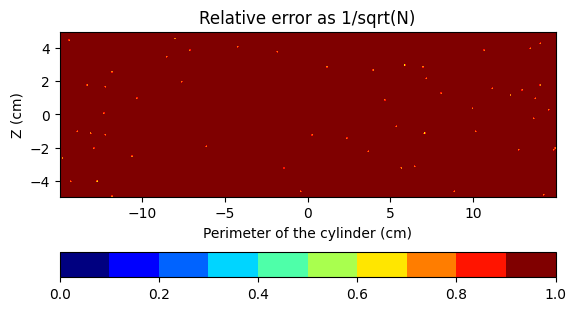

In [22]:
my_rssa.plot_cyl(particle='n',  # plot the neutron tracks
                 z_int=100,  # vertical divisions
                 theta_int=300,  # horizontal divisions
                 norm=2e20,  # used in the normalization of results
                 value_range=(1e14, 1e18),  # range of colors in the legend
                 x_range=(-15, 15),  # x limits of the plot
                 z_range=(-5, 5),  # y limits of the plot
                 # outfolder = 'ouput/folder',  # this will save the figure
                 # filename='custom file name',  # name for the saved image
                 )

But if it was not sufficient it is possible to act on the matplotlib figures
directly:

The area of a cell is 113.08cm2
The resolution is 18.85cm x 6.00cm


Text(0.5, 1.0, 'New title')

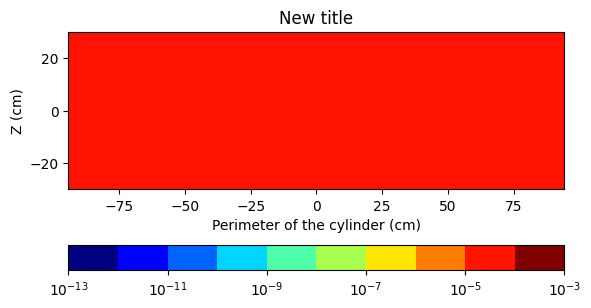

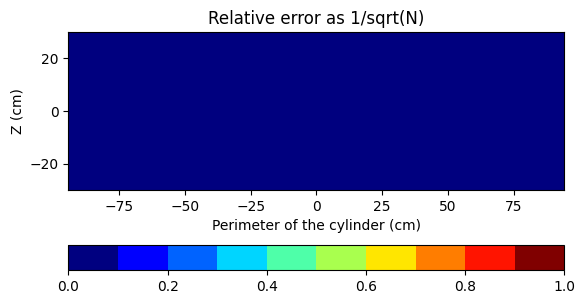

In [19]:
fig_val, fig_err = my_rssa.plot_cyl()  # these are matplotlib.pyplot.Figure objects
fig_val.axes[0].set_title('New title')  # set a different title for instance

## Working with .eeout files (Unstructured Meshes)

F4Enix can also parse outputs of unstrutured meshes MCNP simulation (i.e., eeout files) and export it to .vtu format.

The feature is limited for the moment to 1st and 2nd order tetraheadra with no mixed formulation. The removing of this limitations though would not take much effort and can be considered in the future if deemed necessary.

In [7]:
from f4enix.output.eeout import EEOUT
from pprint import pprint  # just to print dictionaries in a nicer way

# Parse the eeout file
eeout = EEOUT('cyl_tetra1.eeout')
pprint(eeout.info)

{'NUMBER OF 1st HEXS': 0,
 'NUMBER OF 1st PENTS': 0,
 'NUMBER OF 1st TETS': 1306,
 'NUMBER OF 2nd HEXS': 0,
 'NUMBER OF 2nd PENTS': 0,
 'NUMBER OF 2nd TETS': 0,
 'NUMBER OF EDITS': 2,
 'NUMBER OF HISTORIES': 1000000,
 'NUMBER OF INSTANCES': 2,
 'NUMBER OF MATERIALS': 2,
 'NUMBER OF NODES': 391,
 'NUMBER OF PARTICLES': 1}


In [8]:
# A PyVista object is created containing all available data in the eeout file
eeout.grid

UnstructuredGrid (0x22c3e680ee0)
  N Cells:    1306
  N Points:   391
  X Bounds:   -1.000e+01, 1.000e+01
  Y Bounds:   -1.000e+01, 1.000e+01
  Z Bounds:   0.000e+00, 5.000e+01
  N Arrays:   7

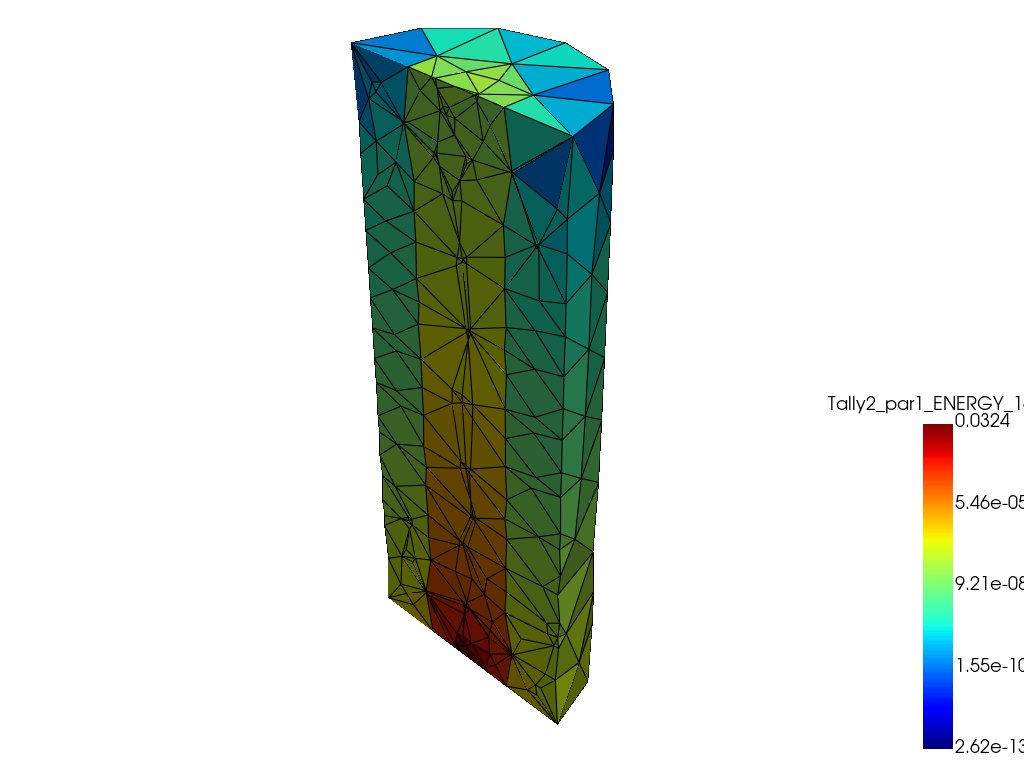

In [21]:
import pyvista as pv

# As usual it is possible to directly work with the PyVista object
plotter = pv.Plotter()
plotter.add_mesh(eeout.grid.clip(), scalars='Tally2_par1_ENERGY_16 - value',
                 log_scale=True, cmap='jet', show_edges=True,
                 scalar_bar_args={'vertical': True})
plotter.show(jupyter_backend='static')


In [22]:
# or export it to .vtu to use it for instance in ParaView
import tempfile  # only for tmp directory

outfolder = tempfile.gettempdir()
eeout.export(outfolder)